In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

In [72]:
df = pd.read_csv('Chennai houseing sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [73]:
df.shape

(7109, 22)

In [74]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

# Data Cleaning by Columns wise

In [75]:
df.shape

(7109, 22)

In [76]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [77]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

PRT_ID

len(df.PRT_ID.unique())

This is a unique column so we dont use this column and hence we drop the same

In [78]:
df.drop(['PRT_ID'], axis = 1, inplace = True)

In [79]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

AREA

In [80]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [81]:
df.AREA = df['AREA'].replace({'Chrompt' : 'Chrompet'})
df.AREA = df['AREA'].replace({'Chormpet' : 'Chrompet'})
df.AREA = df['AREA'].replace({'Chrmpet' : 'Chrompet'})
df.AREA = df['AREA'].replace({'Chormpet' : 'Chrompet'})
df.AREA = df['AREA'].replace({'Karapakam' : 'Karapakkam'})
df.AREA = df['AREA'].replace({'KKNagar' : 'KK Nagar'})
df.AREA = df['AREA'].replace({'Velchery' : 'Velachery'})
df.AREA = df['AREA'].replace({'Ana Nagar' : 'Anna Nagar'})
df.AREA = df['AREA'].replace({'Ann Nagar' : 'Anna Nagar'})
df.AREA = df['AREA'].replace({'Adyr' : 'Adyar'})
df.AREA = df['AREA'].replace({'TNagar' : 'T Nagar'})

Square Feet

In [82]:
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [83]:
q1 = df.INT_SQFT.quantile(0.25)
q3 = df.INT_SQFT.quantile(0.75)
iqr = q3 - q1
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
lower, upper

(-133.5, 2870.5)

DATE OF SALE

In [84]:
df.DATE_SALE

0       04-05-2011
1       19-12-2006
2       04-02-2012
3       13-03-2010
4       05-10-2009
           ...    
7104    03-01-2011
7105    08-04-2004
7106    25-08-2006
7107    03-08-2009
7108    13-07-2005
Name: DATE_SALE, Length: 7109, dtype: object

In [85]:
df.DATE_SALE = pd.to_datetime(df.DATE_SALE)

DISTANCE FROM MAINROAD

In [86]:
df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [87]:
q1 = df.DIST_MAINROAD.quantile(0.25)
q3 = df.DIST_MAINROAD.quantile(0.75)
iqr = q3 - q1
upper = q3 + (iqr * 1.5)
lower = q1 - (iqr * 1.5)
lower, upper

(-97.0, 295.0)

Number Of BEDROOM

In [88]:
df[df.N_BEDROOM.isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,Anna Nagar,1556,2013-01-16,181,NaN,1.0,4,Partiall,No,23-01-1986,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [89]:
df.N_BEDROOM = df['N_BEDROOM'].fillna(df['N_BEDROOM'][0])

In [90]:
df.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

No Of BATHROOM

In [91]:
df[df.N_BATHROOM.isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,Anna Nagar,1589,2010-03-22,39,1.0,NaN,4,Partial,No,02-04-1966,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5087,Chrompet,1016,2012-02-08,105,1.0,NaN,3,AbNormal,Yes,10-08-1980,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6134,Chrompet,916,2012-02-08,173,1.0,NaN,3,Normal Sale,Yes,12-08-1974,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6371,Chrompet,1035,2012-06-11,90,1.0,NaN,3,Partial,No,14-11-1981,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6535,Anna Nagar,1864,2007-05-03,184,2.0,NaN,5,Family,Yes,07-03-1997,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [92]:
df.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [93]:
df.N_BATHROOM = df['N_BATHROOM'].fillna(df['N_BATHROOM'][0])

In [94]:
df.N_BATHROOM.value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

NUMBER OF ROOMS

In [95]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

SALES CONDITION

In [96]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [97]:
df.SALE_COND = df['SALE_COND'].replace({'Adj Land' : 'AdjLand'})
df.SALE_COND = df['SALE_COND'].replace({'Partiall' : 'Partial'})
df.SALE_COND = df['SALE_COND'].replace({'PartiaLl' : 'Partial'})
df.SALE_COND = df['SALE_COND'].replace({'Ab Normal' : 'AbNormal'})

In [98]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

PARKING FACILITY

In [99]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [100]:
df.PARK_FACIL = df['PARK_FACIL'].replace({'Noo' : 'No'})

 DATE BUILD

In [101]:
df.DATE_BUILD[0]

'15-05-1967'

In [102]:
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD)

 BUILDTYPE

In [103]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [104]:
df.BUILDTYPE = df['BUILDTYPE'].replace({'Comercial' : 'Commercial'})
df.BUILDTYPE = df['BUILDTYPE'].replace({'Other' : 'Others'})

UTILITY AVAILABLE

In [105]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [106]:
df.UTILITY_AVAIL = df['UTILITY_AVAIL'].replace({'All Pub' : 'AllPub'})
df.UTILITY_AVAIL = df['UTILITY_AVAIL'].replace({'NoSewr ' : 'NoSewr'})

STREET

In [107]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [108]:
df.STREET = df['STREET'].replace({'Pavd' : 'Paved'})
df.STREET = df['STREET'].replace({'NoAccess' : 'No Access'})

MZZONE

In [109]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [110]:
df['BUILT_YEAR'] = df['DATE_BUILD'].dt.year
df['SOLD_YEAR'] = df['DATE_SALE'].dt.year
df['AGE_OF_HOUSE'] = df['SOLD_YEAR'] - df['BUILT_YEAR']

In [111]:
df['TOTAL_PRICE'] = df['REG_FEE'] + df['COMMIS'] + df['SALES_PRICE']

In [112]:
df.drop(['DATE_BUILD','DATE_SALE','REG_FEE','COMMIS','SALES_PRICE'],axis=1,inplace=True)

In [114]:
df['QS_OVERALL'] = df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [121]:
df.shape

(7109, 20)

In [122]:
df.drop_duplicates(inplace = True)

In [123]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'BUILT_YEAR', 'SOLD_YEAR', 'AGE_OF_HOUSE', 'TOTAL_PRICE'],
      dtype='object')

# EDA

<AxesSubplot:ylabel='AREA'>

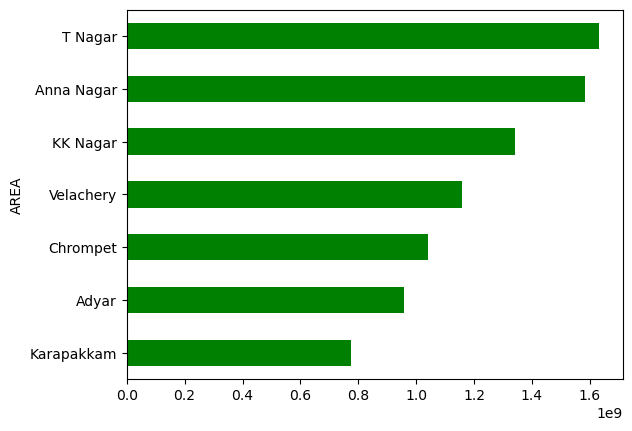

In [125]:
(df.groupby("AREA")['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:xlabel='SOLD_YEAR'>

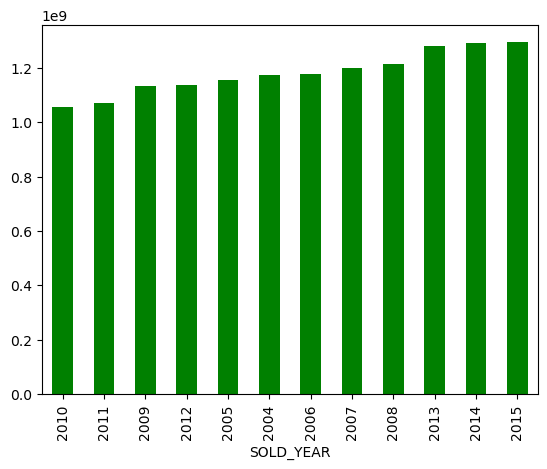

In [129]:
(df.groupby("SOLD_YEAR")['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="bar", color="green")

<AxesSubplot:ylabel='N_BEDROOM'>

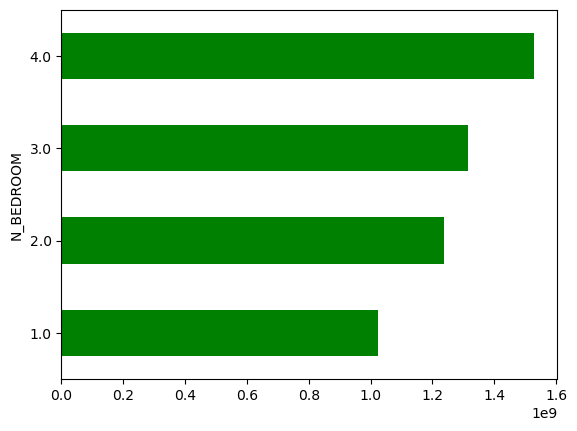

In [130]:
(df.groupby("N_BEDROOM")['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='N_BATHROOM'>

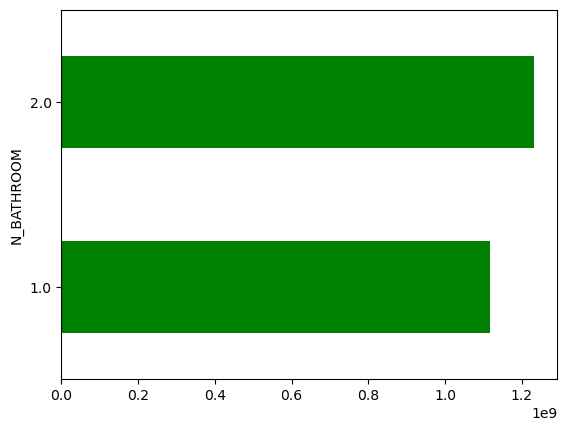

In [131]:
(df.groupby("N_BATHROOM")['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='SALE_COND'>

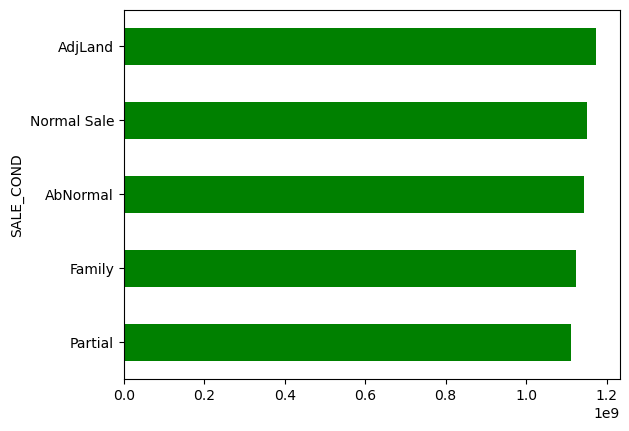

In [132]:
(df.groupby("SALE_COND")['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='PARK_FACIL'>

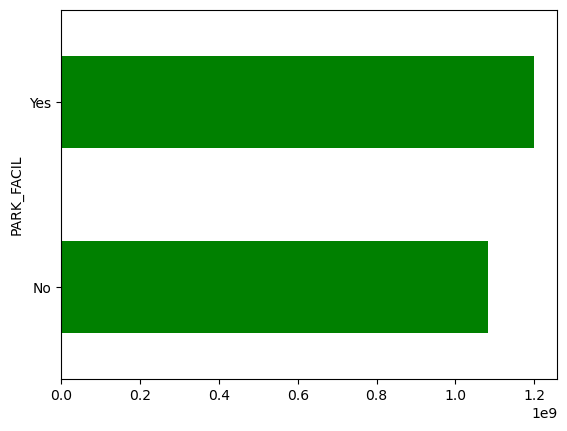

In [133]:
(df.groupby("PARK_FACIL")['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='BUILDTYPE'>

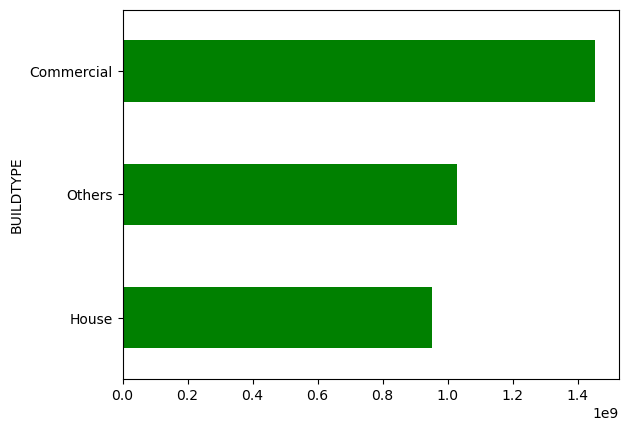

In [134]:
(df.groupby("BUILDTYPE")['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='PARK_FACIL'>

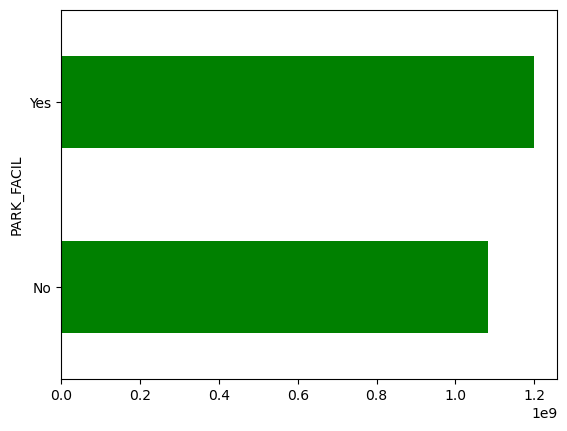

In [135]:
(df.groupby("PARK_FACIL")['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='UTILITY_AVAIL'>

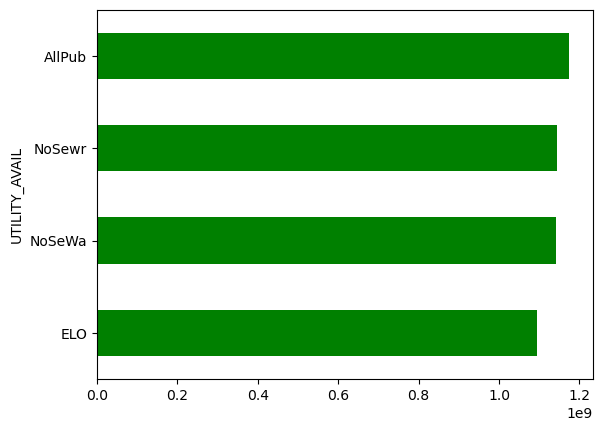

In [136]:
(df.groupby('UTILITY_AVAIL')['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='STREET'>

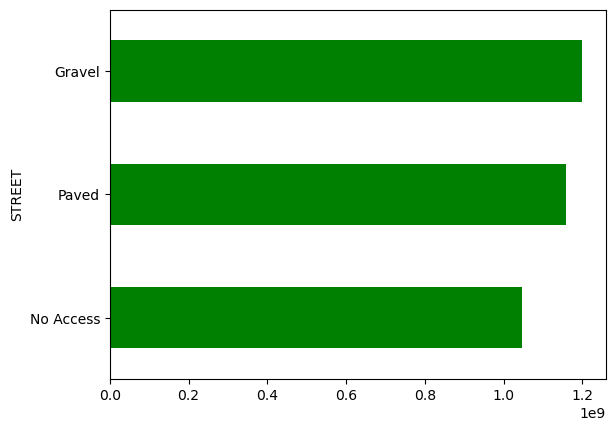

In [137]:
(df.groupby('STREET')['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="barh", color="green")

<AxesSubplot:ylabel='MZZONE'>

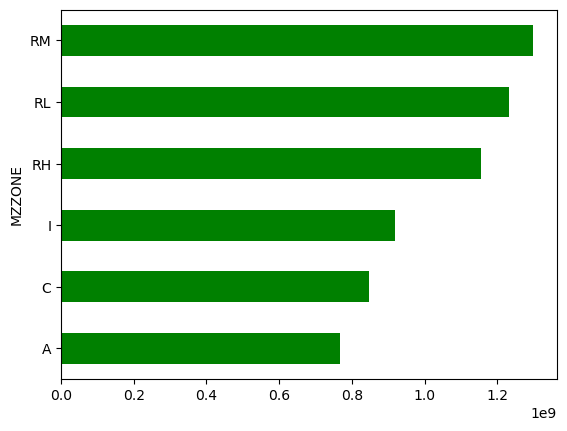

In [138]:
(df.groupby('MZZONE')['TOTAL_PRICE'].mean()*100).sort_values().plot(kind="barh", color="green")

# ENCODING

In [147]:
df['AREA'] = df['AREA'].replace({'Karapakkam' : 6, 'Anna Nagar' : 1, 'Adyar' : 5, 'Velachery' : 3, 'Chrompet' : 4,
                               'KK Nagar' : 2, 'T Nagar' : 0})


df['SALE_COND'] = df['SALE_COND'].replace({'AbNormal' : 2, 'Family' : 3, 'Partial' : 4, 'AdjLand' : 0, 'Normal Sale' : 1})

df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Yes' : 0, 'No' : 1})

df['BUILDTYPE'] = df['BUILDTYPE'].replace({'Commercial' : 0, 'Others' : 1, 'House' : 2})

df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'AllPub' : 0, 'ELO' : 3, 'NoSewr' : 1, 'NoSeWa' : 2})

df['STREET'] = df['STREET'].replace({'Paved' : 1, 'Gravel' : 0, 'No Access' : 2})

df['MZZONE'] = df['MZZONE'].replace({'A' : 5, 'RH' : 2, 'RL' : 1, 'I' : 3, 'C' : 4, 'RM': 0})

In [148]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILT_YEAR,SOLD_YEAR,AGE_OF_HOUSE,TOTAL_PRICE
0,6,1004,131,1.0,1.0,3,2,0,0,0,1,5,4.0,3.9,4.9,4.330,1967,2011,44,8124400
1,1,1986,26,2.0,1.0,5,2,1,0,0,0,2,4.9,4.2,2.5,3.765,1995,2006,11,22781941
2,5,909,70,1.0,1.0,3,2,0,0,3,0,1,4.1,3.8,2.2,3.090,1992,2012,20,13672408
3,3,1855,14,3.0,2.0,5,3,1,1,1,1,3,4.7,3.9,3.6,4.010,1988,2010,22,10063653
4,6,1226,84,1.0,1.0,3,2,0,1,0,0,4,3.0,2.5,4.1,3.290,1979,2009,30,7717313


In [149]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'BUILT_YEAR', 'SOLD_YEAR', 'AGE_OF_HOUSE', 'TOTAL_PRICE'],
      dtype='object')

# Features and Target Variable

In [152]:
X = df[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
        'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'BUILT_YEAR',
        'SOLD_YEAR', 'AGE_OF_HOUSE']]

y = df['TOTAL_PRICE']

# Splitting

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25) 

# Models

# Linear Regression

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict_reg = reg.predict(X_test)
r2_score(y_test,y_predict_reg)

0.8854537801084225

# Decision Tree

In [162]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in range(1,15) :
    dt = DecisionTreeRegressor(max_depth = depth)
    dt.fit(X_train, y_train)
    y_predict_dt = dt.predict(X_test)
    r2 = r2_score(y_test,y_predict_dt)
    print('Depth : ', depth, 'Train Score : ', dt.score(X_train, y_train), 'R2 : ', r2, 'Cross Validation : ', np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring = 'r2')))


Depth :  1 Train Score :  0.3692360660723666 R2 :  0.3664256426063678 Cross Validation :  0.36763391673897294
Depth :  2 Train Score :  0.6970296308577608 R2 :  0.6799145678373885 Cross Validation :  0.6955339402823899
Depth :  3 Train Score :  0.8026102672004556 R2 :  0.7926961903954084 Cross Validation :  0.7968430815824344
Depth :  4 Train Score :  0.8859799626738495 R2 :  0.8747638075698099 Cross Validation :  0.8807438592746415
Depth :  5 Train Score :  0.9207208263088599 R2 :  0.9142326160769128 Cross Validation :  0.9141141181167225
Depth :  6 Train Score :  0.9426238190940518 R2 :  0.9360003280562715 Cross Validation :  0.9346991744480622
Depth :  7 Train Score :  0.9587624349047568 R2 :  0.9481643411887257 Cross Validation :  0.9483356243197525
Depth :  8 Train Score :  0.9721870315604801 R2 :  0.9574542643843098 Cross Validation :  0.9581991151510681
Depth :  9 Train Score :  0.9825557463452992 R2 :  0.9633406908082264 Cross Validation :  0.9624337749774909
Depth :  10 Train 

In [164]:
dt = DecisionTreeRegressor(max_depth = 11)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
r2_score(y_test,y_predict_dt)

0.9639805455484134

# Random Forest

In [165]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, max_depth = 4, max_features = 'sqrt')
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
r2_score(y_test, y_predict_rf)

0.8168105913861814

# XGBoost

In [168]:
import xgboost as xgb

for lr in [0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    xg = xgb.XGBRegressor(learning_rate = lr, n_estimator = 100, verbosity = 0)
    xg.fit(X_train, y_train)
    y_predict_xg = xg.predict(X_test)
    r2 = r2_score(y_test, y_predict_xg)
    print('Learning Rate : ', lr, 'Train Score : ', xg.score(X_train, y_train), 'R2 : ', r2, 'Cross Validation : ', np.mean(cross_val_score(xg, X_train, y_train, cv=10, scoring = 'r2')))


Learning Rate :  0.07 Train Score :  0.9977421321137533 R2 :  0.994409265557146 Cross Validation :  0.9943909659429432
Learning Rate :  0.08 Train Score :  0.9982856463801331 R2 :  0.9951069676452552 Cross Validation :  0.9949868446776925
Learning Rate :  0.09 Train Score :  0.9986105707147181 R2 :  0.99557916566365 Cross Validation :  0.9954827433220738
Learning Rate :  0.1 Train Score :  0.9987947135018665 R2 :  0.9956365567800457 Cross Validation :  0.995817543077625
Learning Rate :  0.2 Train Score :  0.9993008550789545 R2 :  0.9961452604318186 Cross Validation :  0.995697861162108
Learning Rate :  0.3 Train Score :  0.9995204911034068 R2 :  0.9949346751078251 Cross Validation :  0.9943761382163565
Learning Rate :  0.4 Train Score :  0.9995022624461934 R2 :  0.9922329283762774 Cross Validation :  0.9924688232647642
Learning Rate :  0.5 Train Score :  0.9996289779046773 R2 :  0.9894635042127288 Cross Validation :  0.9903109366786149
Learning Rate :  0.6 Train Score :  0.999648089333

In [169]:
xg = xgb.XGBRegressor(learning_rate = 0.1, n_estimator = 100, verbosity = 0)
xg.fit(X_train, y_train)
y_predict_xg = xg.predict(X_test)
r2_score(y_test, y_predict_xg)

0.9956365567800457

# Voting Regressor

In [173]:
from sklearn.ensemble import VotingRegressor

model1 =DecisionTreeRegressor(max_depth = 11)
model2 = RandomForestRegressor(n_estimators = 100, max_depth = 4, max_features = 'sqrt')
model3 = xgb.XGBRegressor(learning_rate = 0.1, n_estimator = 100, verbosity = 0)
model4 = LinearRegression()
model = VotingRegressor(estimators=[('Decision Tree : ', model1), ('Random Forest : ', model2),('XGBoost : ',model3), ('Logistic Regression : ', model4)]) 

model.fit(X_train, y_train)
y_predict_voting = model.predict(X_test)
r2_score(y_test, y_predict_voting)

0.9689561967375775

# R2 Scores

In [176]:
R2 = pd.Series({'XGBoost' : (r2_score(y_test, y_predict_xg)),
                'Voting Regressor' : (r2_score(y_test, y_predict_voting)),
                'Decision Tree' : (r2_score(y_test, y_predict_dt)),
                'Random Forest' : (r2_score(y_test, y_predict_rf)),
                'Linear Regression' : (r2_score(y_test,y_predict_reg))})
R2

XGBoost              0.995637
Voting Regressor     0.968956
Decision Tree        0.963981
Random Forest        0.816811
Linear Regression    0.885454
dtype: float64

In [179]:
best_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_predict_xg.flatten()
    })

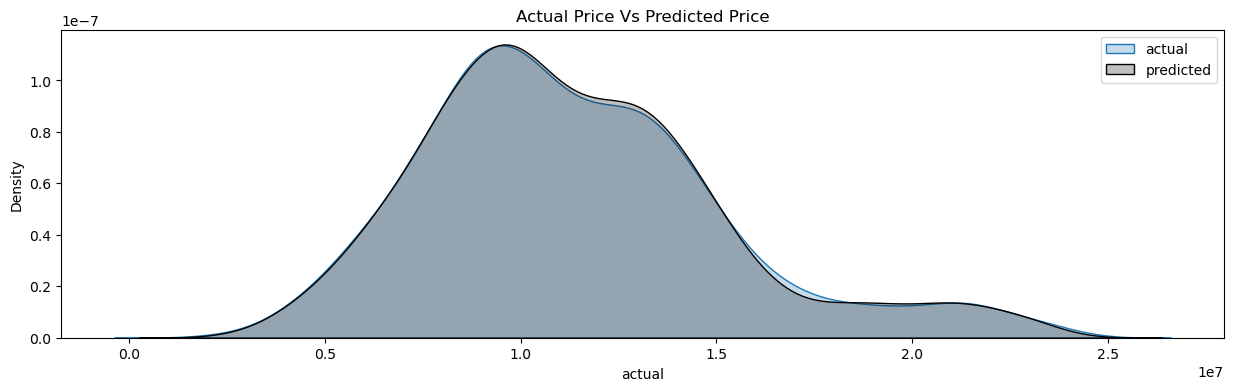

In [180]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=best_prediction, x='actual', label='actual', shade=True)
sns.kdeplot(data=best_prediction, x='predicted', label='predicted', color="black", shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

# Important Features

In [177]:
importances = list((xg.feature_importances_)*100)


feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]


feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

 
[print('{:15} - {}'.format(*pair)) for pair in feature_importances];

BUILDTYPE       - 38.33000183105469
AREA            - 30.350000381469727
N_ROOM          - 14.260000228881836
N_BEDROOM       - 7.019999980926514
INT_SQFT        - 3.549999952316284
MZZONE          - 2.6700000762939453
PARK_FACIL      - 1.2200000286102295
STREET          - 0.9399999976158142
N_BATHROOM      - 0.6800000071525574
SALE_COND       - 0.3100000023841858
AGE_OF_HOUSE    - 0.20999999344348907
BUILT_YEAR      - 0.17000000178813934
UTILITY_AVAIL   - 0.12999999523162842
QS_OVERALL      - 0.03999999910593033
DIST_MAINROAD   - 0.019999999552965164
QS_ROOMS        - 0.019999999552965164
QS_BATHROOM     - 0.019999999552965164
QS_BEDROOM      - 0.019999999552965164
SOLD_YEAR       - 0.019999999552965164


# Result
I have witnessed XGBoost as the best model which yields around 0.9956 R2 score.

# Suggestions
1. Building type and available utilities effects the house price.

2. Commercial buildings and with all public facilities are very expensive.

3. Houses near to Gravel type of street come with highest price.